In [2]:
import pandas as pd
import numpy as np
import ast
import re
from pandas.io.json import json_normalize
pd.set_option('display.max_columns', 200)
#pd.set_option('display.max_colwidth', -1)

In [3]:
df_hotencoded=pd.read_csv('yelpdataset_hotencoded.csv',low_memory=False)

In [4]:
df_hotencoded.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars_x,state,cool,date,funny,review_id,stars_y,text,useful,user_id,romantic,intimate,touristy,hipster,divey,classy,trendy,upscale,casual,American (New),Buffets,Restaurants,Nightlife,Lounges,Bars,American (Traditional),Breakfast & Brunch,Venues & Event Spaces,Event Planning & Services,Steakhouses,Gastropubs,Seafood,Burgers,Nightlife,Bars,Dim Sum,Japanese,Asian Fusion,Chinese,Breakfast & Brunch,African,Pubs,American (New),Barbeque,Restaurants,Southern,Lounges,Dance Clubs,Pizza,Italian,Salad,Local Flavor,Shopping,Arts & Entertainment,Food,Indian,Casinos,Hotels & Travel,Hotels,Sandwiches,Cafes,Event Planning & Services,Noodles,Ramen,Buffets,American (Traditional),Mexican,New Mexican Cuisine,Barbeque,Spanish,Tex-Mex,Caterers,Brazilian,Korean,Desserts,Specialty Food,Vegan,Cocktail Bars,Comfort Food,Tapas/Small Plates,Sushi Bars,Arts & Entertainment,Music Venues,Adult Entertainment,French,Active Life,Golf,Resorts,Mexican,Tacos,Food Delivery Services,Juice Bars & Smoothies,Delis,Performing Arts,Food,French,Soup,Wraps,Hotels,Fish & Chips,British,Casinos,Italian,Bakeries,Coffee & Tea,Car Dealers,Automotive,Wine Bars,Thai,Resorts,Meat Shops,Butcher,Steakhouses,Ethnic Food,Juice Bars & Smoothies,Social Clubs,Latin American,Vegetarian,Beer,Wine & Spirits,Vietnamese,Pizza,Sandwiches,Breweries,Cheese Shops,Specialty Food,Imported Food,Active Life,Amusement Parks,Cheesesteaks,Caterers,Beauty & Spas,Day Spas,Karaoke,Soul Food,Street Vendors,Hair Salons,Beauty & Spas,Professional Services,Employment Agencies,Hotels & Travel
0,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,89109,4227,3.5,NV,0,2013-12-07 00:14:06,0,f0B9-r14-bLudyu5S7aLhw,1,We had dinner at the Bellagio Buffet last nigh...,1,SvMGr_Oih7ivtzmnCL-Tmg,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,89109,4227,3.5,NV,0,2015-12-05 03:28:19,0,A4G1-LTupScgaPmXF1OPMg,4,Around $45 for a dinner on a Friday night.\nSn...,0,W2WICriV5Zf03S4ETzEsiQ,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,89109,4227,3.5,NV,0,2017-02-09 04:48:06,0,aYSR8tO4kBqk0f6_ZYM2Zw,2,Went for Saturday Brunch. Wait was doable comp...,0,3BBiuiNLFuA-0Z4RE2UoQA,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,89109,4227,3.5,NV,1,2010-07-07 16:03:41,1,gCLbUG4PnhwhBKR_5jARjw,2,Having dined at many other Vegas buffets (the ...,4,7zphSXBrxDGChNlNkoGSng,0,0,0,0,0,0,0,

In [5]:
df_hotencoded.shape

(254487, 153)

In [6]:
#since we are focus only on restaruants, we determine the number of restaruants in the dataset.
df_hotencoded[' Restaurants'].value_counts()

1    202840
0     51647
Name:  Restaurants, dtype: int64

In [7]:
#reduce the dataset to include only those rows with restaurants ==1
df_restaurant=df_hotencoded[df_hotencoded[' Restaurants']==1]
df_restaurant.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars_x,state,cool,date,funny,review_id,stars_y,text,useful,user_id,romantic,intimate,touristy,hipster,divey,classy,trendy,upscale,casual,American (New),Buffets,Restaurants,Nightlife,Lounges,Bars,American (Traditional),Breakfast & Brunch,Venues & Event Spaces,Event Planning & Services,Steakhouses,Gastropubs,Seafood,Burgers,Nightlife,Bars,Dim Sum,Japanese,Asian Fusion,Chinese,Breakfast & Brunch,African,Pubs,American (New),Barbeque,Restaurants,Southern,Lounges,Dance Clubs,Pizza,Italian,Salad,Local Flavor,Shopping,Arts & Entertainment,Food,Indian,Casinos,Hotels & Travel,Hotels,Sandwiches,Cafes,Event Planning & Services,Noodles,Ramen,Buffets,American (Traditional),Mexican,New Mexican Cuisine,Barbeque,Spanish,Tex-Mex,Caterers,Brazilian,Korean,Desserts,Specialty Food,Vegan,Cocktail Bars,Comfort Food,Tapas/Small Plates,Sushi Bars,Arts & Entertainment,Music Venues,Adult Entertainment,French,Active Life,Golf,Resorts,Mexican,Tacos,Food Delivery Services,Juice Bars & Smoothies,Delis,Performing Arts,Food,French,Soup,Wraps,Hotels,Fish & Chips,British,Casinos,Italian,Bakeries,Coffee & Tea,Car Dealers,Automotive,Wine Bars,Thai,Resorts,Meat Shops,Butcher,Steakhouses,Ethnic Food,Juice Bars & Smoothies,Social Clubs,Latin American,Vegetarian,Beer,Wine & Spirits,Vietnamese,Pizza,Sandwiches,Breweries,Cheese Shops,Specialty Food,Imported Food,Active Life,Amusement Parks,Cheesesteaks,Caterers,Beauty & Spas,Day Spas,Karaoke,Soul Food,Street Vendors,Hair Salons,Beauty & Spas,Professional Services,Employment Agencies,Hotels & Travel
0,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,89109,4227,3.5,NV,0,2013-12-07 00:14:06,0,f0B9-r14-bLudyu5S7aLhw,1,We had dinner at the Bellagio Buffet last nigh...,1,SvMGr_Oih7ivtzmnCL-Tmg,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,89109,4227,3.5,NV,0,2015-12-05 03:28:19,0,A4G1-LTupScgaPmXF1OPMg,4,Around $45 for a dinner on a Friday night.\nSn...,0,W2WICriV5Zf03S4ETzEsiQ,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,89109,4227,3.5,NV,0,2017-02-09 04:48:06,0,aYSR8tO4kBqk0f6_ZYM2Zw,2,Went for Saturday Brunch. Wait was doable comp...,0,3BBiuiNLFuA-0Z4RE2UoQA,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,89109,4227,3.5,NV,1,2010-07-07 16:03:41,1,gCLbUG4PnhwhBKR_5jARjw,2,Having dined at many other Vegas buffets (the ...,4,7zphSXBrxDGChNlNkoGSng,0,0,0,0,0,0,0,

In [8]:
#determine cities and number of user reviews on restaurants only.
city_breakdown=pd.crosstab(index=df_restaurant["city"],columns="count") 
city_breakdown

col_0,count
city,
Gilbert,2097
Henderson,2020
Las Vegas,176927
Montréal,2348
Phoenix,13104
Scottsdale,4086
Tempe,2258


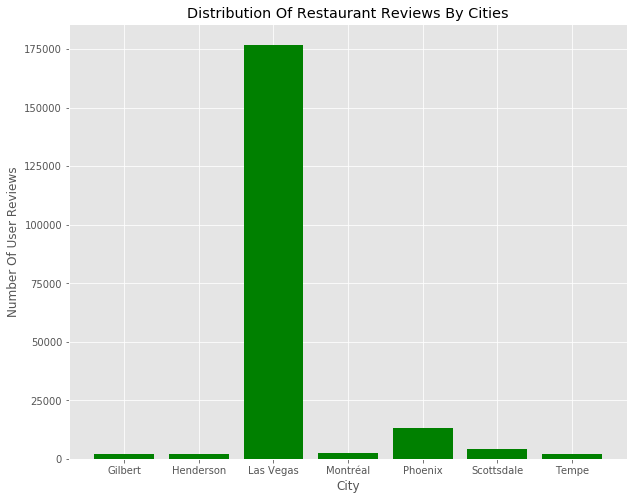

In [9]:
#from the plot, it is clear that Las Vegas has the most number of restaurant reviews. 
# we will proceed to use narrow down on the further analysis and build recommendation engine based on 
#data set from Las Vegas Only.
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(10,8))
x_pos = [i for i, _ in enumerate(city_breakdown.index)]

plt.bar(x_pos, city_breakdown['count'], color='green')
plt.xlabel("City")
plt.ylabel("Number Of User Reviews")
plt.title("Distribution Of Restaurant Reviews By Cities")

plt.xticks(x_pos, city_breakdown.index)

plt.show()

In [10]:
#remove restaurants that are not located in Las Vegas
df_restaurant_LA=df_restaurant[df_restaurant['city']=='Las Vegas']

df_restaurant_LA

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars_x,state,cool,date,funny,review_id,stars_y,text,useful,user_id,romantic,intimate,touristy,hipster,divey,classy,trendy,upscale,casual,American (New),Buffets,Restaurants,Nightlife,Lounges,Bars,American (Traditional),Breakfast & Brunch,Venues & Event Spaces,Event Planning & Services,Steakhouses,Gastropubs,Seafood,Burgers,Nightlife,Bars,Dim Sum,Japanese,Asian Fusion,Chinese,Breakfast & Brunch,African,Pubs,American (New),Barbeque,Restaurants,Southern,Lounges,Dance Clubs,Pizza,Italian,Salad,Local Flavor,Shopping,Arts & Entertainment,Food,Indian,Casinos,Hotels & Travel,Hotels,Sandwiches,Cafes,Event Planning & Services,Noodles,Ramen,Buffets,American (Traditional),Mexican,New Mexican Cuisine,Barbeque,Spanish,Tex-Mex,Caterers,Brazilian,Korean,Desserts,Specialty Food,Vegan,Cocktail Bars,Comfort Food,Tapas/Small Plates,Sushi Bars,Arts & Entertainment,Music Venues,Adult Entertainment,French,Active Life,Golf,Resorts,Mexican,Tacos,Food Delivery Services,Juice Bars & Smoothies,Delis,Performing Arts,Food,French,Soup,Wraps,Hotels,Fish & Chips,British,Casinos,Italian,Bakeries,Coffee & Tea,Car Dealers,Automotive,Wine Bars,Thai,Resorts,Meat Shops,Butcher,Steakhouses,Ethnic Food,Juice Bars & Smoothies,Social Clubs,Latin American,Vegetarian,Beer,Wine & Spirits,Vietnamese,Pizza,Sandwiches,Breweries,Cheese Shops,Specialty Food,Imported Food,Active Life,Amusement Parks,Cheesesteaks,Caterers,Beauty & Spas,Day Spas,Karaoke,Soul Food,Street Vendors,Hair Salons,Beauty & Spas,Professional Services,Employment Agencies,Hotels & Travel
0,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.113220,-115.176890,The Buffet at Bellagio,89109,4227,3.5,NV,0,2013-12-07 00:14:06,0,f0B9-r14-bLudyu5S7aLhw,1,We had dinner at the Bellagio Buffet last nigh...,1,SvMGr_Oih7ivtzmnCL-Tmg,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.113220,-115.176890,The Buffet at Bellagio,89109,4227,3.5,NV,0,2015-12-05 03:28:19,0,A4G1-LTupScgaPmXF1OPMg,4,Around $45 for a dinner on a Friday night.\nSn...,0,W2WICriV5Zf03S4ETzEsiQ,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.113220,-115.176890,The Buffet at Bellagio,89109,4227,3.5,NV,0,2017-02-09 04:48:06,0,aYSR8tO4kBqk0f6_ZYM2Zw,2,Went for Saturday Brunch. Wait was doable comp...,0,3BBiuiNLFuA-0Z4RE2UoQA,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.113220,-115.176890,The Buffet at Bellagio,89109,4227,3.5,NV,1,2010-07-07 16:03:41,1,gCLbUG4PnhwhBKR_5jARjw,2,Having dined at many other Vegas buffets (the ...,4,7zphSXBrxDGChNlNkoGSng,0,0,0,

In [11]:
df_restaurant_LA.shape

(176927, 153)

In [12]:
df_restaurant_LA.to_csv('yelpdataset_restaurant_LA.csv',index=False)

In [13]:
#find out number of reviews a user given.
#we will count by number of 'star_y' ratings given.
#star_y is the user rating for each business_id.
#distribution of how many reviews a user has given sorted in descending order. 
df_restaurant_LA['user_id'].value_counts().head(20)

U4INQZOPSUaj8hMjLlZ3KA    60
F_5_UNX-wrAFCXuAkBZRDw    54
PKEzKWv_FktMm2mGPjwd0Q    47
bLbSNkLggFnqwNNzzq-Ijw    40
Ryxj0u0AW3mRsRypdYli2A    38
UYcmGbelzRa0Q6JqzLoguw    36
o4tYl3Hz0oDfpNn4k02DCw    33
3nDUQBjKyVor5wV0reJChg    33
C2C0GPKvzWWnP57Os9eQ0w    32
MqcfaSdLXh7H1Aey_HPUsw    32
oeAhRa8yFa9jtrhaHnOyxQ    31
YMgZqBUAddmFErxLtCfK_w    31
n86B7IkbU20AkxlFX_5aew    30
eZZyuJDouIg4p-GYB3PV_A    30
epkRB3J_oBEiyiwahvdmGg    29
hZfzVrhsCQ9JDAb2jYoJNQ    29
JaqcCU3nxReTW2cBLHounA    28
PomQayG1WhMxeSl1zohAUA    28
QJI9OSEn6ujRCtrX06vs1w    28
tH0uKD-vNwMoEc3Xk3Cbdg    28
Name: user_id, dtype: int64

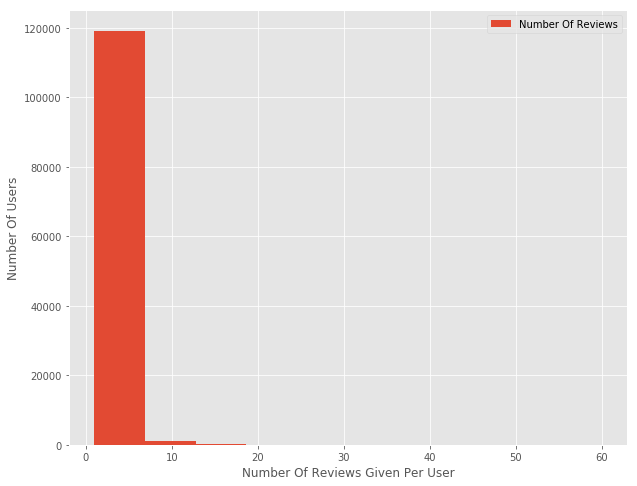

In [14]:
#from bar chart, the number of users who give 1-5 review are very high.
#but number of users who give >5 reviews are proportionally much lower.
plt.figure(figsize=(10,8))
plt.hist(df_restaurant_LA['user_id'].value_counts(),label='Number Of Reviews')
plt.xlabel('Number Of Reviews Given Per User')
plt.ylabel('Number Of Users')
plt.legend(loc='upper right')
plt.show()

In [15]:
df_rest_LA_vc=df_restaurant_LA['user_id'].value_counts()
df_rest_LA_vc.head()

U4INQZOPSUaj8hMjLlZ3KA    60
F_5_UNX-wrAFCXuAkBZRDw    54
PKEzKWv_FktMm2mGPjwd0Q    47
bLbSNkLggFnqwNNzzq-Ijw    40
Ryxj0u0AW3mRsRypdYli2A    38
Name: user_id, dtype: int64

In [16]:
#number of users who give 1 reivew =92667
#number of users who give 2 reivews =16772
#Total number of users who gave reviews =120645

df_R_LA_VC=df_rest_LA_vc.value_counts()
print ('Number Of Reviews Given And Their Respective Number Of Users:','\n',df_R_LA_VC.head())
print ('Number of Users Who Gave Reviews :',df_R_LA_VC.sum())

Number Of Reviews Given And Their Respective Number Of Users: 
 1    92667
2    16771
3     5452
4     2419
5     1186
Name: user_id, dtype: int64
Number of Users Who Gave Reviews : 120645


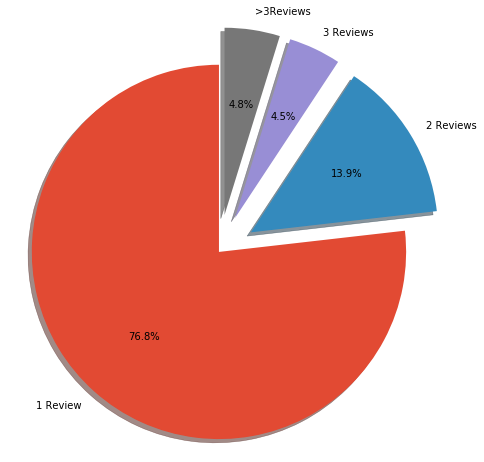

In [17]:
plt.figure(figsize=(8,8))
sizes=[df_R_LA_VC[df_R_LA_VC.index==1], 
       df_R_LA_VC[df_R_LA_VC.index==2],
       df_R_LA_VC[df_R_LA_VC.index==3],
       df_R_LA_VC[df_R_LA_VC.index>3].sum()]
labels=['1 Review','2 Reviews', '3 Reviews','>3Reviews']
explode=(0,0.2,0.2,0.2)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [18]:
#distribution of individual user ratings for restaurants 
df_starY_distribution=df_restaurant_LA.groupby('stars_y')['user_id'].nunique().sort_values(ascending=False).to_frame()
df_starY_distribution

,user_id
stars_y,
5,58743
4,37214
3,20767
1,16171
2,14759


In [19]:
df_starY_distribution=df_starY_distribution.sort_values(by=['stars_y'])
df_starY_distribution=df_starY_distribution.reset_index()
df_starY_distribution

,stars_y,user_id
0,1,16171
1,2,14759
2,3,20767
3,4,37214
4,5,58743


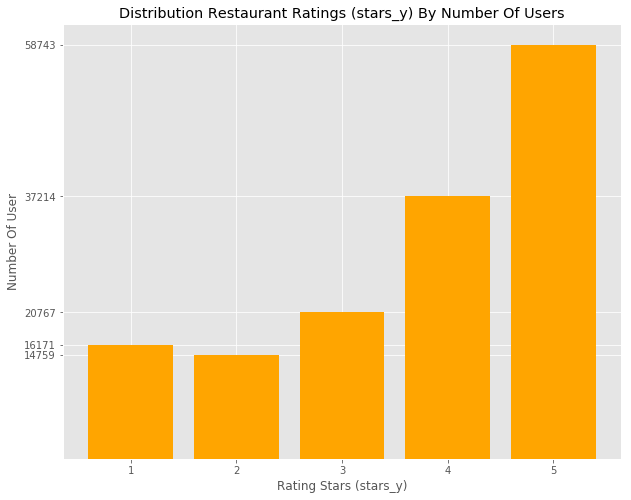

In [20]:
#plot out the distribution of user ratings (stars_y) for restaurants
plt.style.use('ggplot')
x_p=[i for i in df_starY_distribution['stars_y']]
y_p=[i for i in df_starY_distribution['user_id']]

plt.figure(figsize=(10,8))
plt.bar(x_p,y_p, color='orange')
plt.xlabel("Rating Stars (stars_y)")
plt.ylabel("Number Of User")
plt.title("Distribution Restaurant Ratings (stars_y) By Number Of Users")

plt.xticks(x_p)
plt.yticks(y_p)

plt.show()

In [21]:
#compare one star to 5 star rating user's text reviews
df_restaurant_LA__user_1star=df_restaurant_LA[df_restaurant_LA['stars_y']==1].text
df_restaurant_LA__user_1star.shape
#number of 1 star ratings is higher than number of user that gave 1 star. 
#That means some users give many 1 star ratings

(16961,)

In [22]:
df_restaurant_LA__user_1star=df_restaurant_LA__user_1star.reset_index(drop=True)
df_restaurant_LA__user_1star.head()

0    We had dinner at the Bellagio Buffet last nigh...
1    I came here to try it out cuz people said its ...
2    The buffet at the Bellagio has gone downhill i...
3    Too bad I could not give 1/2 star! I used to m...
4    The WORST!\nFirst of all let me say I felt lik...
Name: text, dtype: object

In [23]:
df_restaurant_LA__user_1star[1]

"I came here to try it out cuz people said its one of the best buffet on the strip, but I don't think so.\nPaying $80 for the good that doesn't even taste that good it's not really worth it. I rather go to fine-dining restaurant. I guess Buffett is just never good"

In [24]:
#number of users that gave 5 stars =58743.
#number of 5 stars rating is > 58743. That means some users give more than one time of 5 star ratings.
df_restaurant_LA__user_5star=df_restaurant_LA[df_restaurant_LA['stars_y']==5].text
df_restaurant_LA__user_5star.shape

(70576,)

In [25]:
df_restaurant_LA__user_5star=df_restaurant_LA__user_5star.reset_index(drop=True)
df_restaurant_LA__user_5star.head()

0    Still the best dinner buffet on the strip. Sta...
1    This place gives buffets a good name. The food...
2    My friend and I came in on a Friday around 4pm...
3    Mother of all Vegas Buffets!\n\nTo make the mo...
4    man went at brunch time (11am) line looked lon...
Name: text, dtype: object

In [26]:
import time
import multiprocessing as mp
from multiprocessing import Lock

def multiprocess_obj(df):
    pool = mp.Pool(mp.cpu_count())
    if __name__ == '__main__':
        start=time.time()
        for i,txt in enumerate(df):
            numrows=len(df)
            pool.apply_async(wordcorpus_mp, args=(i,txt,numrows), callback=collect_result)
        pool.close()
        pool.join()
        end = time.time()
        print ('\n','Total Time Taken:', end-start)

In [27]:
from IPython.display import clear_output
results=''
def collect_result(cw):
    global results
    clear_output(wait=True)
    #print('Current Progress :',len(results),'of ',num_rows)
    results = results+cw
    return results

In [28]:
comment_words=''
def wordcorpus_mp(i,txt,numrows):
    start=time.time()
    global comment_words
    start=time.time()
    clear_output(wait=True)
    tokens=txt.split()
    for n in range(len(tokens)): 
        tokens[n] = tokens[n].lower() 
    for words in tokens: 
        comment_words = comment_words + words + ' '
    end = time.time()
    print('Current Progress :',i,'of ',numrows)
    #print ('Time Taken:', end-start)
    return comment_words

In [29]:
from wordcloud import WordCloud, STOPWORDS 


def makewordcloud(comment_words):
    stopwords = set(STOPWORDS) 

    wordcloud = WordCloud(width = 800, height = 800, 
                        background_color ='white', 
                        stopwords = stopwords, 
                        min_font_size = 10).generate(comment_words) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

In [30]:
import random
def main_makecloud(starlist,randomseed):
    random.seed(randomseed)
    RandList=random.sample(range(1,len(starlist)+1),len(starlist)//10)
    #RandList1star=random.sample(range(1, 16962), 16961//10)
    #RandList5star=random.sample(range(1, 70577), 70577//10)
    df=starlist[RandList]
    multiprocess_obj(df)
    makewordcloud(results)


 Total Time Taken: 64.3246397972107


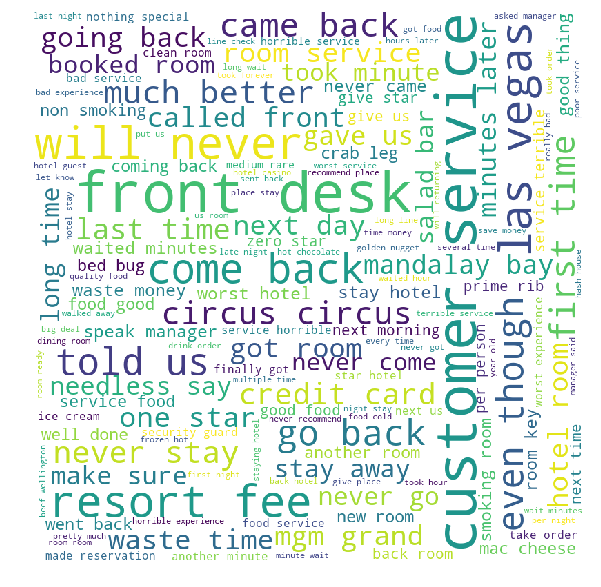

In [31]:
#make word cloud for 1star reviews, 10%sampling. 
main_makecloud(df_restaurant_LA__user_1star,100)

In [ ]:
main_makecloud(df_restaurant_LA__user_1star,500)


 Total Time Taken: 210.04721307754517



 Total Time Taken: 2615.0010056495667


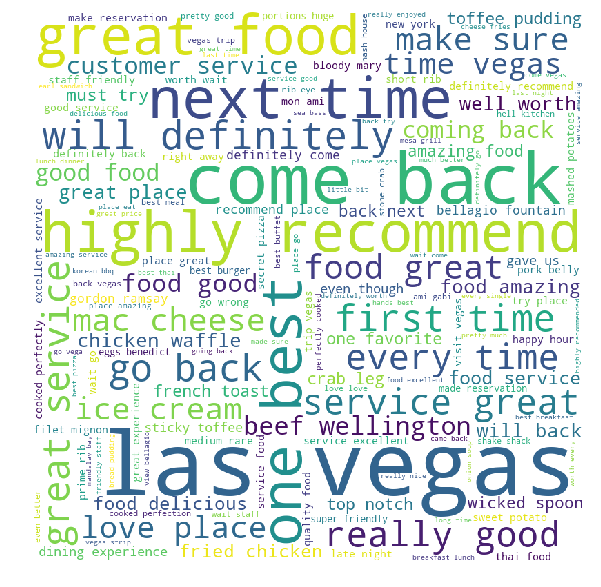

In [44]:
main_makecloud(df_restaurant_LA__user_5star,100)


 Total Time Taken: 2267.7329120635986


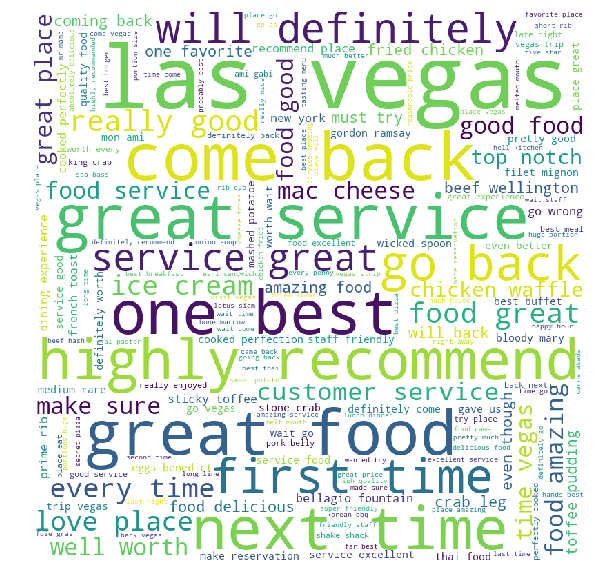

In [29]:
main_makecloud(df_restaurant_LA__user_5star,500)

#get one star to 5 star rating user's text reviews and form a word cloud.
def wordcloud_starReview(df):
    numrows=len(df)
    cw= wordcorpus(df,numrows)
    makewordcloud(cw)    

comment_words=''
def wordcorpus(df,numrows):
    start=time.time()
    global comment_words
    for i in range(numrows):
        start=time.time()
        clear_output(wait=True)
        tokens=df[i].split()
        for n in range(len(tokens)): 
            tokens[n] = tokens[n].lower() 
        for words in tokens: 
            comment_words = comment_words + words + ' '
        end = time.time()
        print('Current Progress :',i,'of ',numrows)
    print ('Time Taken:', end-start)
    return comment_words

from wordcloud import WordCloud, STOPWORDS 

def makewordcloud(comment_words):
    stopwords = set(STOPWORDS) 

    wordcloud = WordCloud(width = 800, height = 800, 
                        background_color ='white', 
                        stopwords = stopwords, 
                        min_font_size = 10).generate(comment_words) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

from wordcloud import WordCloud, STOPWORDS 

def makewordcloud(comment_words):
    stopwords = set(STOPWORDS) 

    wordcloud = WordCloud(width = 800, height = 800, 
                        background_color ='white', 
                        stopwords = stopwords, 
                        min_font_size = 10).generate(comment_words) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

makewordcloud(results)